## Pranav Bhagat

### Project Name : Web scraping to anaylse the English Premier League table.

### Objective

The main objective of this assignment is to find out insights about a website using web scraping methods. For this purpose, I have selected the English Premier League website. This website contains a table of the Premier League standings for this year. It has features such as Name of the club, last 5 match results, wins, draws and defeats.

For scraping this website, I have used BeautifulSoup library. This library is useful for scraping details off webpages and to display them. I have selected a website which has a table in it so it would be easier to plot data.

Using my analysis, I will aim to find out which clubs may finish at the top half of the table, which club can win the competion based on points and recent results and try to find out some more insights. I'll also try to find out the top 4 teams which have a chance of qualifying for the champions league. I would also be looking at the bottom 3 clubs in the league as well as their recent results and will they be able to beat relegation based on recent results. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup

Here I have imported the libraries necessary for the analysis.

In [2]:
pdf1 = pd.read_html("https://www.premierleague.com/tables")

In [3]:
PLT = "https://www.premierleague.com/tables"

Here I have imported the webpages using the necessary urls.

In [4]:
WebData = requests.get(PLT)

In [5]:
type(WebData)

requests.models.Response

In [6]:
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [7]:
status_check(WebData)

Success!


1

In [8]:
def encoding_check(r):
    return (r.encoding)

In [9]:
encoding_check(WebData)

'utf-8'

Here we check the encoding of the webpage

In [10]:
def decode_content(r,encoding):
    return (r.content.decode(encoding))

In [11]:
DataonPage = decode_content(WebData,encoding_check(WebData))

In [12]:
type(DataonPage)

str

Here I have displayed the type of contents on the webpage

In [13]:
len(DataonPage)

713604

Here I have displayed the length of Data on the webpage

In [14]:
soup = BeautifulSoup(DataonPage, 'html.parser')

In [15]:
type(soup)

bs4.BeautifulSoup

In [16]:
txt_dump=soup.text

In [17]:
print(txt_dump[20000:24000])

2020
BHA

1 -1

WAT








Manchester United



Sunday 23 February 2020
MUN

14:00

WAT












Watford



Recent Result - Saturday 8 February 2020

BHA

1 -1

WAT




Next Fixture - Sunday 23 February 2020

MUN

14:00

WAT




Visit Watford Club Page




Performance Chart
Compare against another team










20


Previous Position
                            
                                20
                            





Norwich CityNOR

25
4
6
15
24
47
 
        -23

 
18


D



Wednesday 1 January 2020
NOR

1 -1

CRY






L



Saturday 11 January 2020
MUN

4 -0

NOR






W



Saturday 18 January 2020
NOR

1 -0

BOU






L



Wednesday 22 January 2020
TOT

2 -1

NOR






D



Saturday 1 February 2020
NEW

0 -0

NOR








Liverpool



Saturday 15 February 2020
NOR

17:30

LIV












Norwich City



Recent Result - Saturday 1 February 2020

NEW

0 -0

NOR




Next Fixture - Saturday 15 February 2020

NOR

17:30

LIV




Visit Norwich City Club Page




Performan

Here I have printed some of the data on the Webpage.

### Data Mining

In [18]:
df = pd.concat(pdf1[0:39])

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
df.columns

Index(['Club', 'Drawn  D', 'Form', 'GA', 'GD', 'GF', 'Lost  L', 'Next',
       'Played  Pl', 'Points  Pts', 'Position  Pos', 'Unnamed: 11',
       'Unnamed: 12', 'Won  W'],
      dtype='object')

Here I have placed the data in the table on the webpage in a pandas dataframe.

In [20]:
form1 = df['Form']

In [21]:
form2 = form1.tolist()

In [22]:
form2[1]

'Liverpool  Recent Result - Saturday 1 February 2020  LIV  4 -0  SOU  Next Fixture - Saturday 15 February 2020  NOR  17:30  LIV  Visit Liverpool Club Page'

Here I have printed the recent result of the club which is at the top of the league

In [23]:
form2[39]

'Norwich City  Recent Result - Saturday 1 February 2020  NEW  0 -0  NOR  Next Fixture - Saturday 15 February 2020  NOR  17:30  LIV  Visit Norwich City Club Page'

In [24]:
form2[37]

'Watford  Recent Result - Saturday 8 February 2020  BHA  1 -1  WAT  Next Fixture - Sunday 23 February 2020  MUN  14:00  WAT  Visit Watford Club Page'

In [25]:
form2[35]

'West Ham United  Recent Result - Saturday 1 February 2020  WHU  3 -3  BHA  Next Fixture - Wednesday 19 February 2020  MCI  19:30  WHU  Visit West Ham United Club Page'

Here I have displayed the last results of the bottom 3 clubs.

In [26]:
form2[9]

'Sheffield United  Recent Result - Sunday 9 February 2020  SHU  2 -1  BOU  Next Fixture - Saturday 22 February 2020  SHU  15:00  BHA  Visit Sheffield United Club Page'

In [27]:
form2[11]

'Tottenham Hotspur  Recent Result - Sunday 2 February 2020  TOT  2 -0  MCI  Next Fixture - Sunday 16 February 2020  AVL  14:00  TOT  Visit Tottenham Hotspur Club Page'

These are the teams which are at the 5th and 6th position who have a chance to clinch champions league qualification based on their last results.

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
pdf3 = df.iloc[::2]

Here I have removed the unnecessary contents in the data and made it better foe my analysis.

In [30]:
del pdf3['Next']

In [31]:
del pdf3['Unnamed: 11']

In [32]:
del pdf3['Unnamed: 12']

In [33]:
del pdf3['Form']

Here I deleted the rows which would not be needed in my analysis.

In [34]:
pdf4 = pdf3.head(20)

I have only displayed the top 10 rows which will be required for my plots.

In [35]:
pdf4.columns

Index(['Club', 'Drawn  D', 'GA', 'GD', 'GF', 'Lost  L', 'Played  Pl',
       'Points  Pts', 'Position  Pos', 'Won  W'],
      dtype='object')

In [36]:
pdf4.index=range(20)

In [37]:
pdf5 = pdf4.rename(columns={"Drawn  D": "Drawn", "Lost  L": "Lost", "Played  Pl": "Played", "Points  Pts":"Points", "Position  Pos":"Position", "Won  W": "Won"})

Here I rename the columns to make them better for my analysis.

In [38]:
pdf5['Rank'] = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)

I inserted a new column - 'Rank' which will be needed for my analysis.

In [39]:
pdf5

,Club,Drawn,GA,GD,GF,Lost,Played,Points,Position,Won,Rank
0,LiverpoolLIV,1,15,+45,60,0,25,73,1 Previous Position 1,24,1
1,Manchester CityMCI,3,29,+36,65,6,25,51,2 Previous Position 2,16,2
2,Leicester CityLEI,5,26,+28,54,6,26,50,3 Previous Position 3,15,3
3,ChelseaCHE,5,34,+9,43,8,25,41,4 Previous Position 4,12,4
4,Sheffield UnitedSHU,9,24,+4,28,7,26,39,5 Previous Position 6,10,5
5,Tottenham HotspurTOT,7,32,+8,40,8,25,37,6 Previous Position 5,10,6
6,Wolverhampton WanderersWOL,12,32,+3,35,6,26,36,7 Previous Position 8,8,7
7,EvertonEVE,6,38,-4,34,10,26,36,8 Previous Position 9,10,8
8,Manchester UnitedMUN,8,29,+7,36,8,25,35,9 Previous Position 7,9,9
9,ArsenalARS,13,34,-2,32,6,25,31,10 Previous Position 10,6,10


Here I have displayed the final table which I extracted from the website. I cleaned the data and created new columns as well as arranged the extracted data in order to get a clean table without any NaN or missing or misplaced values.

# Plots

### 1. Barplot

In [40]:
ax = pdf5['Club']
bx = pdf5['Points']
bz = [int(i) for i in bx]

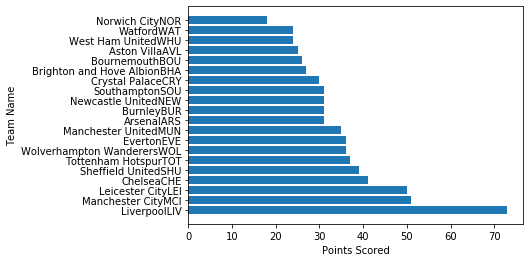

In [41]:
plt.barh(ax, bz)
plt.xlabel('Points Scored')
plt.ylabel('Team Name')
plt.show()

Here I have displayed a plot which shows the number of points accumulated by every team till this point of the season. As we can see, Liverpool have accumulated the highest number of points.

### 2. ScatterPlot

In [42]:
GFx = [int(i) for i in pdf5['GF']]
GAx = [int(i) for i in pdf5['GA']]

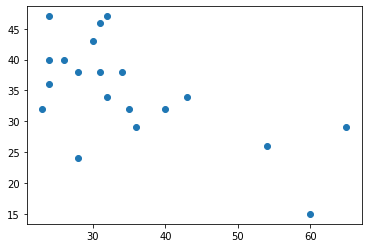

In [43]:
plt.scatter(GFx,GAx)
plt.show()

Here I have displayed a scatter plot which shows the number of goals conceded vs the number of goals scored. As we can see most of the teams in the top half of the table have scored more goals and conceaded less number of goals.

In [44]:
Win_list = pdf5["Won"].tolist() 
Loss_list = pdf5["Lost"].tolist() 
Draw_list = pdf5['Drawn'].tolist()
Rank_L = pdf5['Rank'].tolist()

In [45]:
test_list1 = [int(i) for i in Win_list]
test_list2 = [int(i) for i in Loss_list]
test_list4 = [int(i) for i in Rank_L]
test_list3 = [int(i) for i in Draw_list]

I have converted the string rows into integers for better plots.

### 3. Histogram

In [46]:
Wins = test_list1
Defeats = test_list2
Draws = test_list3

In [47]:
W1 = np.asarray(Wins)
D1 = np.asarray(Defeats)

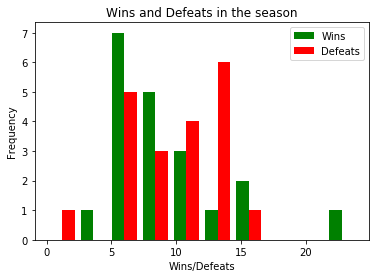

In [48]:
legend = ['Wins', 'Defeats']
plt.hist([W1, D1], color=['green','Red'])
plt.xlabel("Wins/Defeats")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Wins and Defeats in the season')
plt.show()

Here I have displayed a plot which shows the number of wins and defeats faced by each team this season.

### 4. Plot

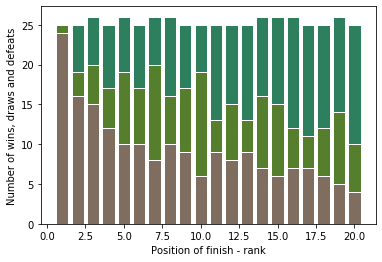

<Figure size 1800x1800 with 0 Axes>

In [49]:
import numpy as np

Rank = test_list4
bars = np.add(Wins, Draws).tolist()


plt.bar(Rank, Wins, color='#7f6d5f', edgecolor='white')
# Create green bars (middle), on top of the firs ones
plt.bar(Rank, Draws, bottom=Wins, color='#557f2d', edgecolor='white')
# Create green bars (top)
plt.bar(Rank, Defeats, bottom=bars, color='#2d7f5e', edgecolor='white')

plt.xlabel('Position of finish - rank')  
plt.ylabel('Number of wins, draws and defeats')
plt.figure(figsize = (25,25))

plt.show()  

Here I have displayed a plot which shows the number of matches won, lost and draws by each team according to the rank of the team. As you can see the team with most wins is the leftmost of the x axis and the team at the bottom of the table is the rightmost.

### 5. Line Plot

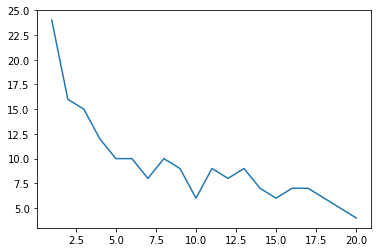

In [50]:
plt.plot(Rank,Wins)

Here I have shown a line plot. It has the number of wins on the Y axis and the position of the club in the league on the X axis.

### 6. BoxPlot

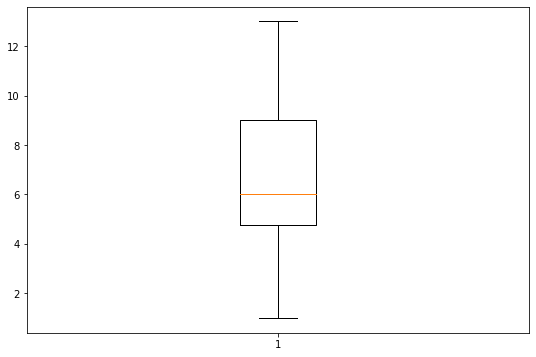

In [51]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
axw = fig.add_subplot(111)

# Create the boxplot
bpw = axw.boxplot(Draws)

Here I have shown a BoxPlot on the number of Draws that each team has had. As we can see, the mean of draws is 6 and the highest number of draws that any team has had are 13 and the lowest being 1. Most of the teams have drawn around 5 to 9 matches. 

### Findings

According to my analysis,


1. Liverpool is at the top of the league and may win the league as they have won 24 of the 25 matches played this season and drawn 1 with no defeats. Also they are in good form having won 5 of their last games.


2. In order to finish in the top half of the table a team should have less goals conceded and more goals scored.


3. The top four teams at this point of the season are Liverpool, Manchester City, Leicester City and Chelsea which have a higher chance of qualifying for the champions league if they maintain their record. Sheffield United and Tottenham Hotspur have a chance to cling the 3rd and 4th spots from Leicester City and Chelsea if they keep up their good form having won 2 consecutive games.


4. West Ham, Watford and Norwich are likely to be relegated this season but West ham have not won any of their last 5 games hence there is a greater threat of relegation to them than the other teams. Also Crystal Palace have lost their last 3 games which puts them in a bad form and they may replace either Norwich or Watford in the relegation zone if it continues.

### Recommendations

1. For a team to finish in the top half of the table, they should score more goals and concede less.


2. Liverpool need to maintain their form if they want to win the league this season but the second team in the league after them has a deficit of nearly 20 points with 13 matches to go and are not in great form hence we can say they have effectively won the league.


3. West Ham are going to be relegated this season unless they can find ways to improve their form.


4. The clubs looking to secure champions leaguespots still have a lot to play for since none ofthe teams are in great form and even the point difference is not much.